# Project-6 Global Power Plant Database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing CSV File

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("The number of Rows and Columns in the dataset are:",df.shape)

The number of Rows and Columns in the dataset are: (907, 27)


In [4]:
print("The number of duplicate rows are:",df.duplicated().sum())

The number of duplicate rows are: 0


In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Observation:

Columns we are going remove are :

1.estimated_generation_gwh - Empty

2.wepp_id - Empty

3.other_fuel2 - 98% data missing

4.other_fuel3 - Empty

5.owner - More than 60 % data missing

6.year_of_capacity_data - Missing data with single unique value

7.country - non relevalent info

8.country_long - non relevalent info

9.gppd_idnr -non relevalent info

10.url - No missing value but of no use

11.other_fuel1=85% data missing

In [7]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# Checking Null Values

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

observation:

1.Out of 27 columns, 12 are in object form and rest are in float

2.Missing values in latitute, longitude, commissioning_year,year_of_capacity_data,generation_gwh_2013,2014,2015, 2016, 2017

3.There is no value in other_fuel3,wepp_id, estimated_generation_gwh

4.Column: 'country', 'country_long' contains same value
    
5.gppd_idnr is a code

6.High skewness in 'capacity_mw'

7.No duplicate rows

8.By using, primary_fuel, then it will be a classification problem

9.By using, capacity_mw, then it will be a regression problem

# Dropping Unnecessary Columns

In [9]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2','other_fuel1',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [10]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority


In [11]:
df.shape

(907, 16)

Observation:

1.As Geolocation source is categorical data we can impute it with mode of category.

2.longitude and latitude can be impute with mean or median of longitude and latitude.

3.As commissioning year for most of industrial powerplant is missing(40%).

4.For Renewable energy source based powerplant no alternate fuel needed.

5.In generation_data_source 50% data is missing and it doesnot have any importance in our analysis.

In [12]:
df.drop(['generation_data_source'],axis=1,inplace=True)
df.shape

(907, 15)

<AxesSubplot:>

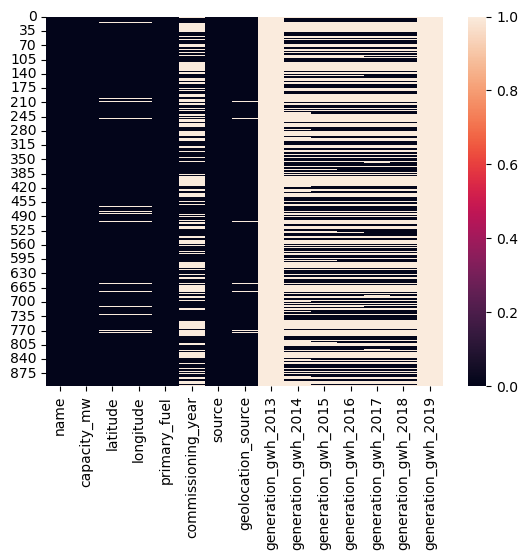

In [15]:
sns.heatmap(df.isnull())

# Missing value imputation

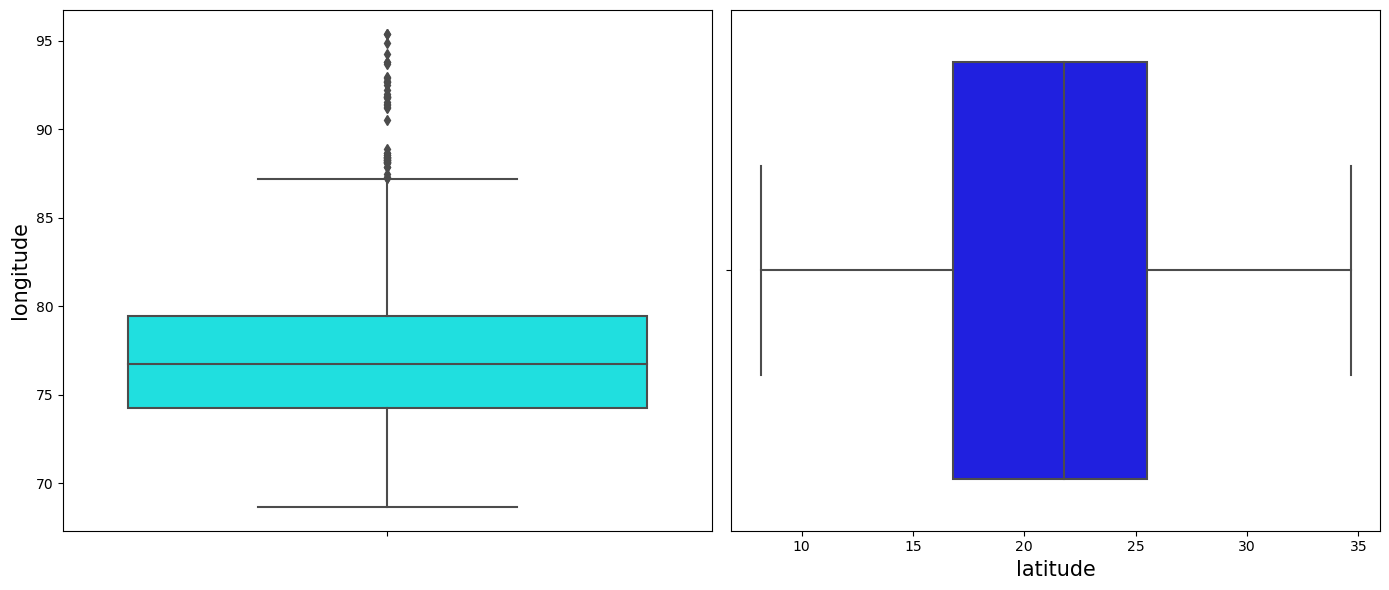

In [16]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

Observation:

1.Based on presense of outliers we will impute longitude we with median.

2.Based on absense of outliers we will impute latitude we with mean.

# Imputing Missing Values

In [17]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.427103,4.815073,68.6447,74.388900,76.719500,79.206100,95.408
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000
generation_gwh_2016,434.0,2467.936859,4162.884308,0.0000,188.285252,737.205450,3282.861313,30015.000
generation_gwh_2017,440.0,2547.759305,4196.991169,0.0000,177.874930,817.977250,3275.690475,35116.000
generation_gwh_2018,448.0,2600.804099,4314.880456,0.0000,193.378250,751.644375,3143.535900,35136.000


In [19]:
df.drop(['generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

In [20]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


# Statistical Summary

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.427103,4.815073,68.6447,74.388900,76.719500,79.206100,95.408
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000
generation_gwh_2016,434.0,2467.936859,4162.884308,0.0000,188.285252,737.205450,3282.861313,30015.000
generation_gwh_2017,440.0,2547.759305,4196.991169,0.0000,177.874930,817.977250,3275.690475,35116.000
generation_gwh_2018,448.0,2600.804099,4314.880456,0.0000,193.378250,751.644375,3143.535900,35136.000


In [22]:
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())

In [25]:
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mean())

In [27]:
df.isnull().sum()

name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.427103,4.815073,68.6447,74.388900,76.719500,79.206100,95.408
commissioning_year,907.0,1997.091082,13.016360,1927.0000,1997.091082,1997.091082,2003.000000,2018.000
generation_gwh_2014,907.0,2431.823590,2665.338608,0.0000,1211.362750,2431.823590,2431.823590,28127.000
generation_gwh_2015,907.0,2428.226946,2859.349132,0.0000,916.000000,2428.226946,2428.226946,30539.000
generation_gwh_2016,907.0,2467.936859,2877.890004,0.0000,896.500214,2467.936859,2467.936859,30015.000
generation_gwh_2017,907.0,2547.759305,2921.502193,0.0000,882.594850,2547.759305,2547.759305,35116.000
generation_gwh_2018,907.0,2600.804099,3030.808041,0.0000,824.842340,2600.804099,2600.804099,35136.000


Observation:

1.Bigest Powerplant has power generation capacity of 4760 MW.

2.In each Generation-GWHours columns Mean is greater than Median.

3.Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.

4.Oldest powerplant commission date back to 1927 and most recent powerplant is build in 2018.
We will check in which timeframe most of powerplants are commission.

5.Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.

# Target Feature-- Capacity

In [29]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


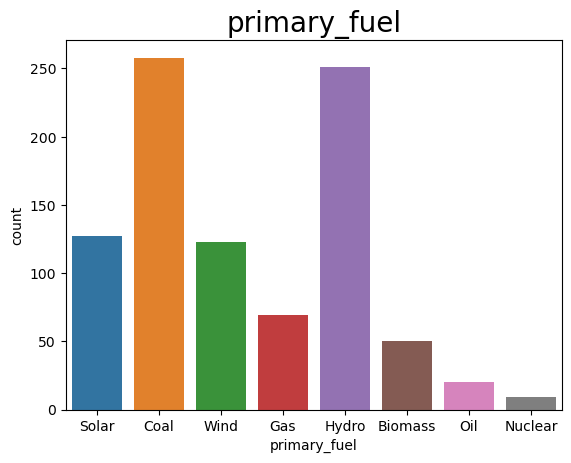

In [30]:
sns.countplot('primary_fuel',data=df)
plt.title('primary_fuel',fontsize=20)
plt.show()

Observation:

1.Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.

2.Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces.

3.There are very few Nuclear powerplant. Usually these powerplant build for high capacity. 

# Primary fuel Vs Capacity MW

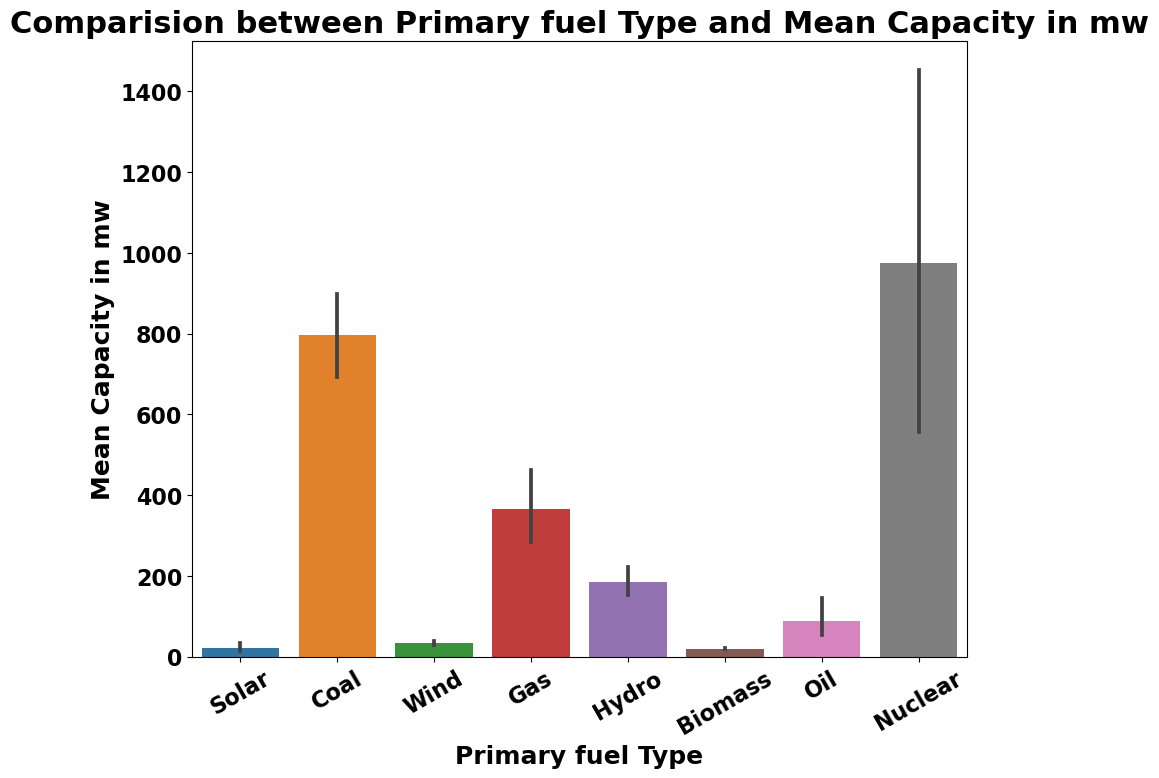

In [31]:
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

# Primary Fuel VS generation growth

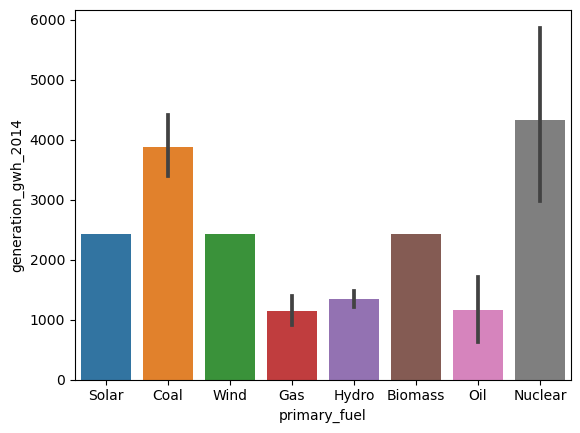

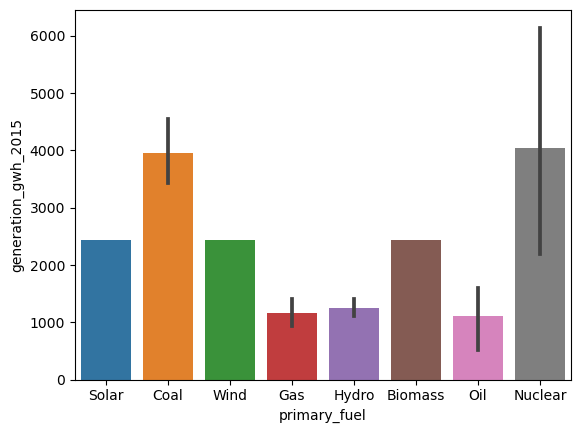

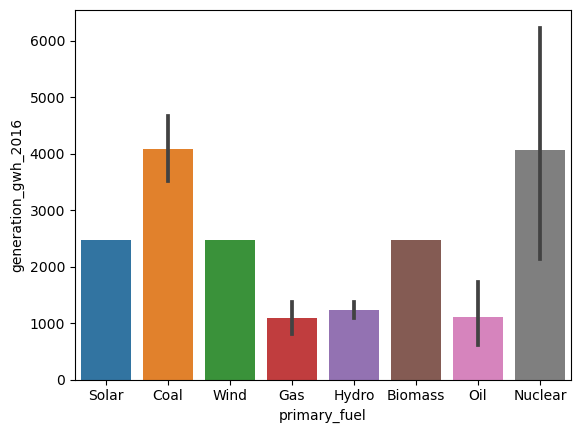

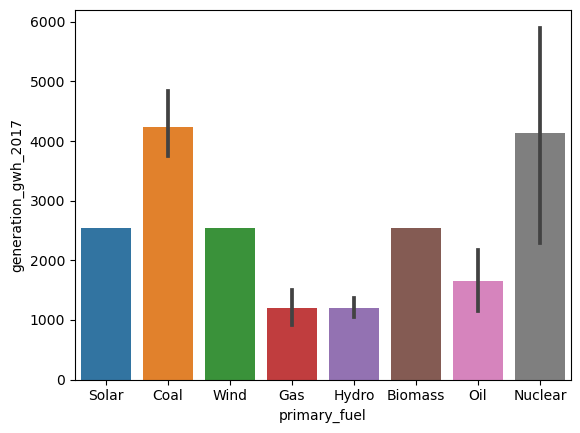

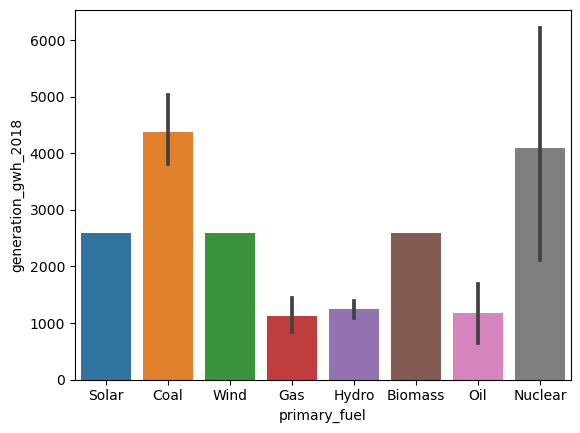

In [34]:


# Checking generation growth in years
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=df)
plt.show()
sns.barplot(x='primary_fuel',y='generation_gwh_2015',data=df)
plt.show()

sns.barplot(x='primary_fuel',y='generation_gwh_2016',data=df)
plt.show()

sns.barplot(x='primary_fuel',y='generation_gwh_2017',data=df)
plt.show()
sns.barplot(x='primary_fuel',y='generation_gwh_2018',data=df)
plt.show()


Observation:

1.From the graph we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal.
Reason is high efficieny of Nuclear powerplants.

2.Other fuel types have very less contribution to power generation.

# Capacity VS Generation Growth

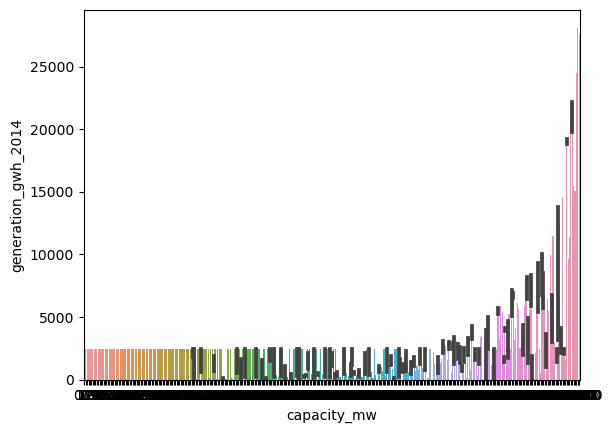

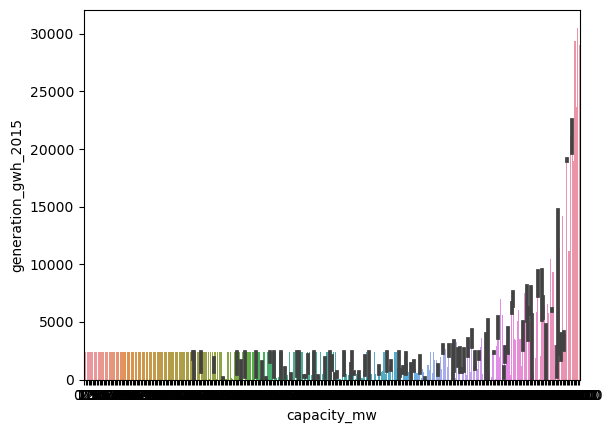

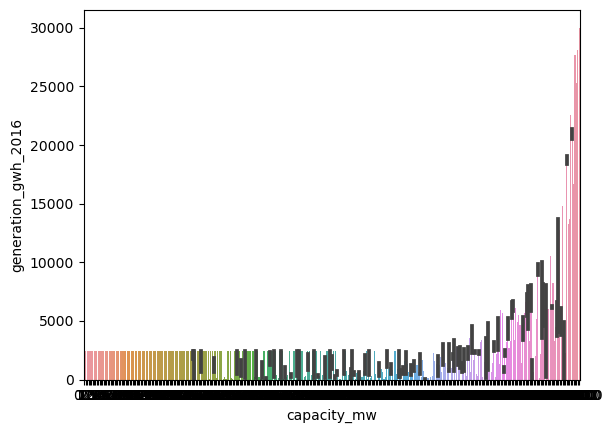

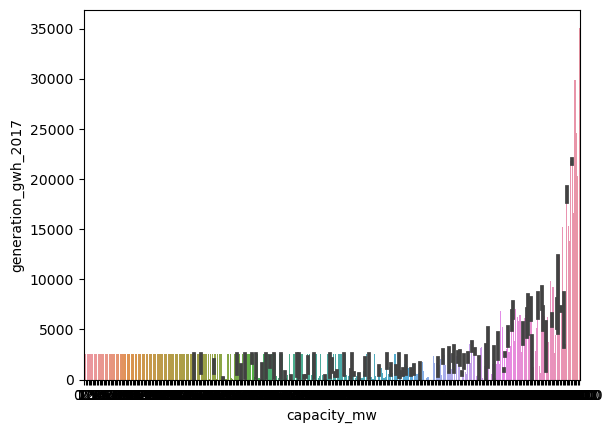

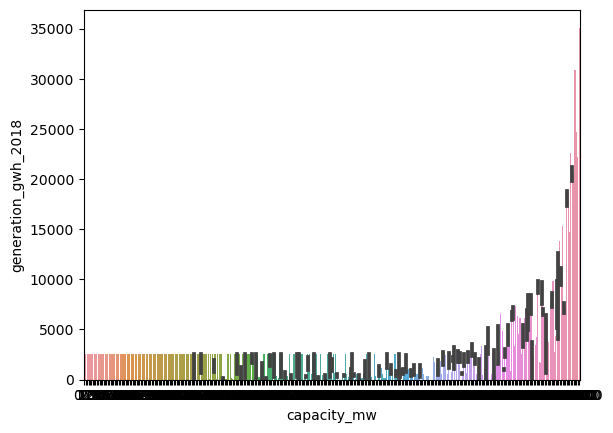

In [35]:
# Checking generation growth in years
sns.barplot(x='capacity_mw',y='generation_gwh_2014',data=df)
plt.show()
sns.barplot(x='capacity_mw',y='generation_gwh_2015',data=df)
plt.show()

sns.barplot(x='capacity_mw',y='generation_gwh_2016',data=df)
plt.show()

sns.barplot(x='capacity_mw',y='generation_gwh_2017',data=df)
plt.show()
sns.barplot(x='capacity_mw',y='generation_gwh_2018',data=df)
plt.show()

Observation:

1.There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
2.The plot shows the electricity generation reported for the years 2014,2015,2016,2017,2018have high capacity of above 1000mw.
3.Also the power generation growth is more than 5000gwh in all the years.
4.As the electricity generation growth increases, the capacity of plant also increases.

# Comparision between Primary Fuel and (longitude,Latitude)

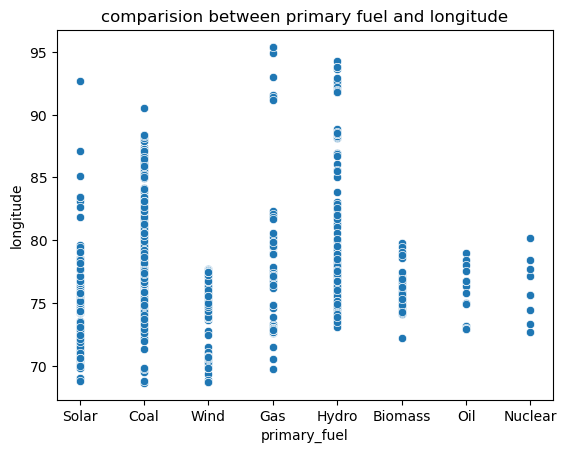

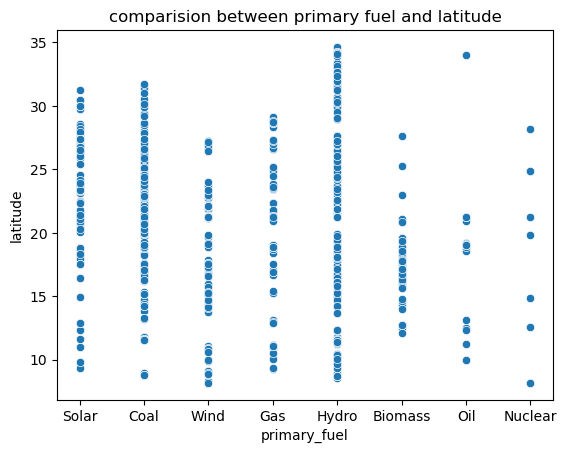

In [36]:
sns.scatterplot(x='primary_fuel',y='longitude',data=df)
plt.title('comparision between primary fuel and longitude')
plt.show()

sns.scatterplot(x='primary_fuel',y='latitude',data=df)
plt.title('comparision between primary fuel and latitude')
plt.show()

Observation:

1.Location is important feature specially for Nuclear powerplants.

2.These plants lies in between 15 to 25 latitude and longitudnal range of 75 to 88 degree.

3.We can also see solar power plant are mostly establish in certain range of latitude and longitude.

4.This might be due to clear and intense sunlight with minimum humidity.

# Comparision between CapacityMW and (Longitude,Latitude)

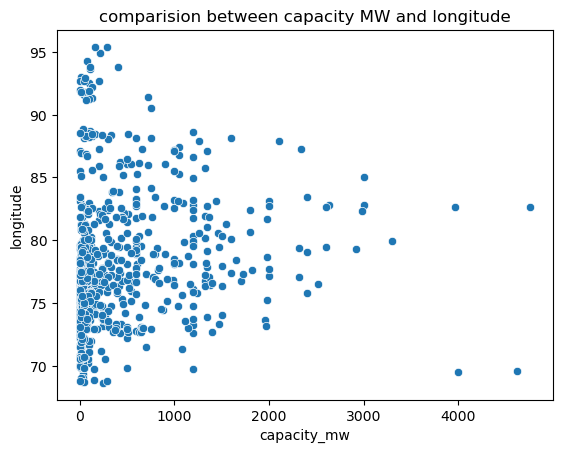

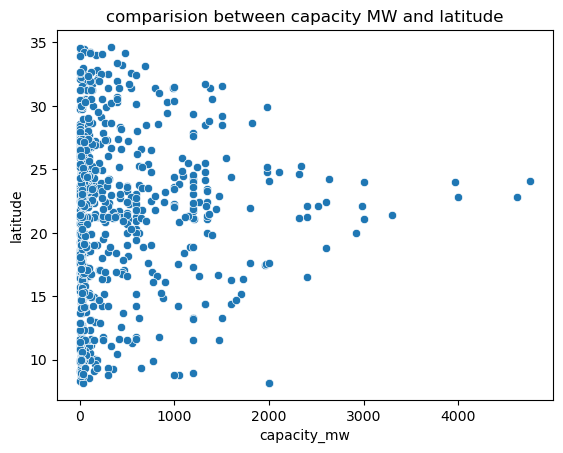

In [37]:
sns.scatterplot(x='capacity_mw',y='longitude',data=df)
plt.title('comparision between capacity MW and longitude')
plt.show()

sns.scatterplot(x='capacity_mw',y='latitude',data=df)
plt.title('comparision between capacity MW and latitude')
plt.show()

# Geolocation Source and Capacity

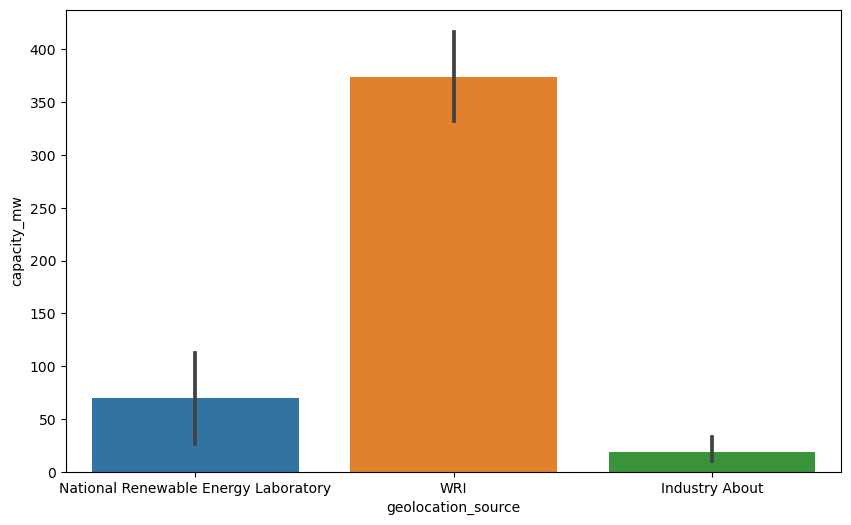

In [38]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

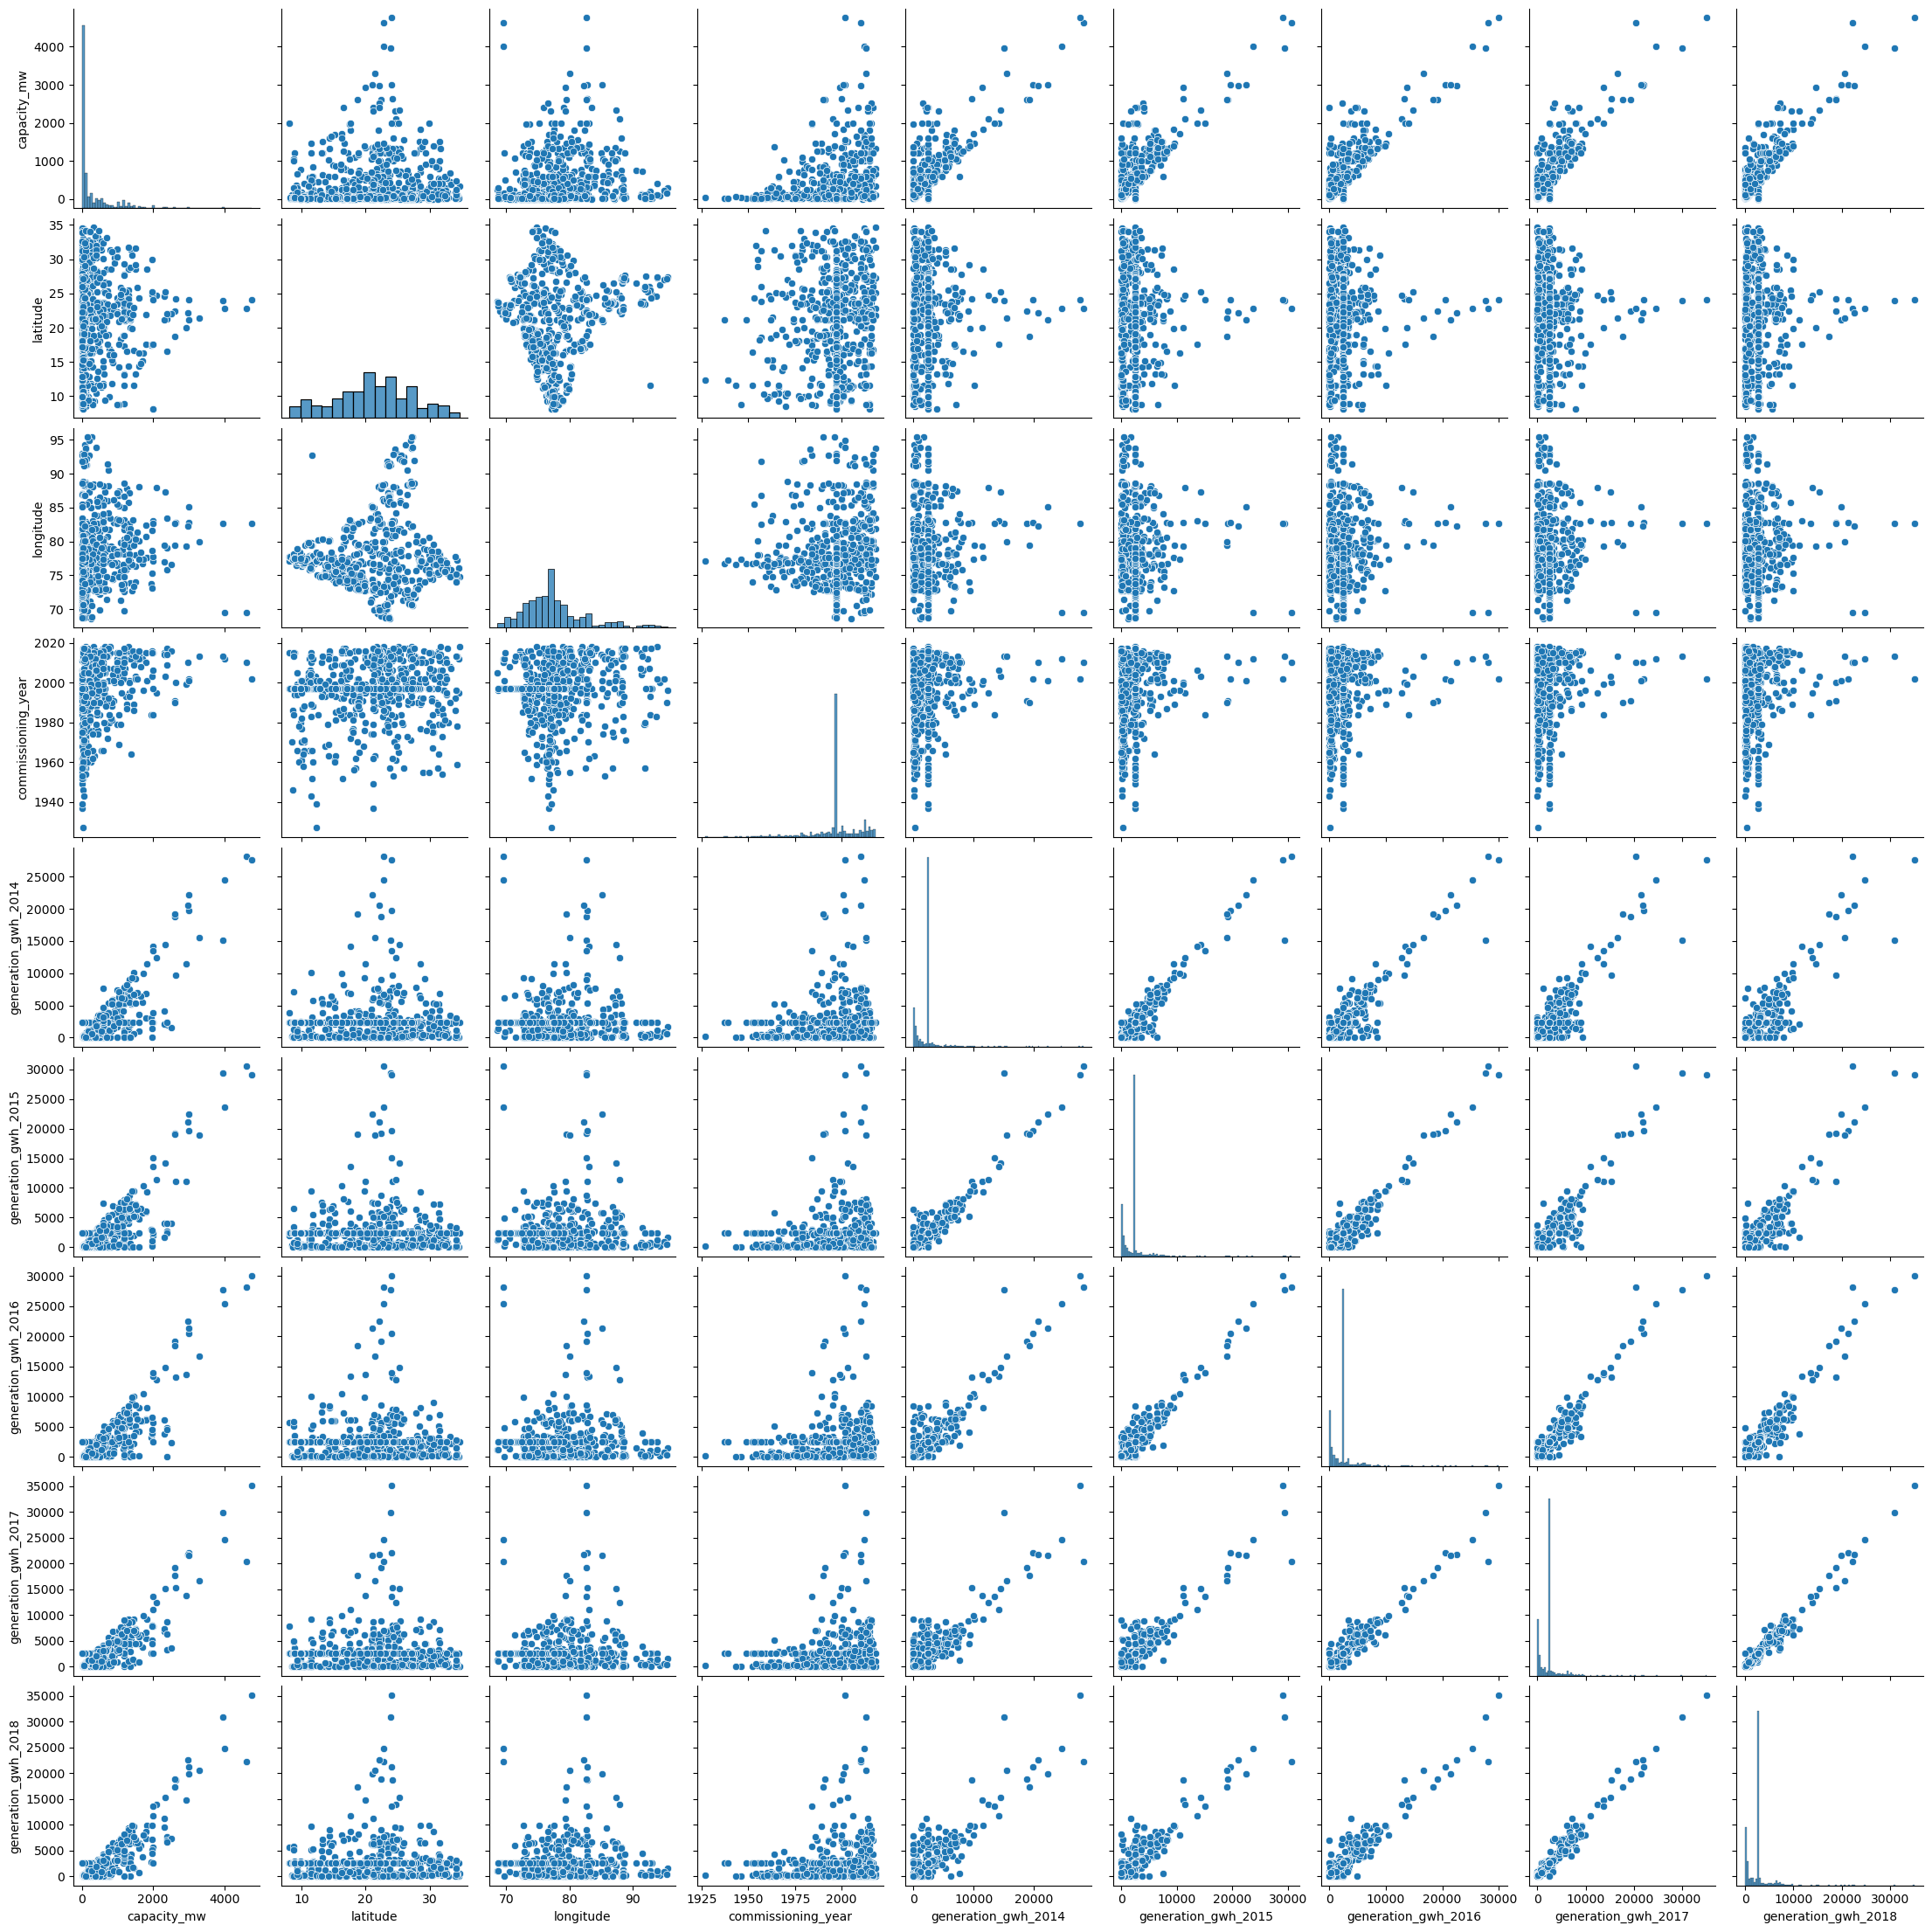

In [40]:
sns.pairplot(data=df)

Observation:

1.Most of the features have strong linear relationship and correlation with each other.

2.From the plot we can observe the outliers in some of the columns.

3.We can see histogram on the diagonal.

# Encoding Categorical Columns

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
Category=['primary_fuel', 'source', 'geolocation_source']
le = LabelEncoder()
for i in Category:
    df[i]=le.fit_transform(df[i])
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,6,2011.000000,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,1,1997.091082,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,7,1997.091082,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,AGARTALA GT,135.0,23.8712,91.3602,2,2004.000000,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,1,2015.000000,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [43]:
df.drop(['name'],axis=1,inplace=True)

In [44]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


# Checking And Removing Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

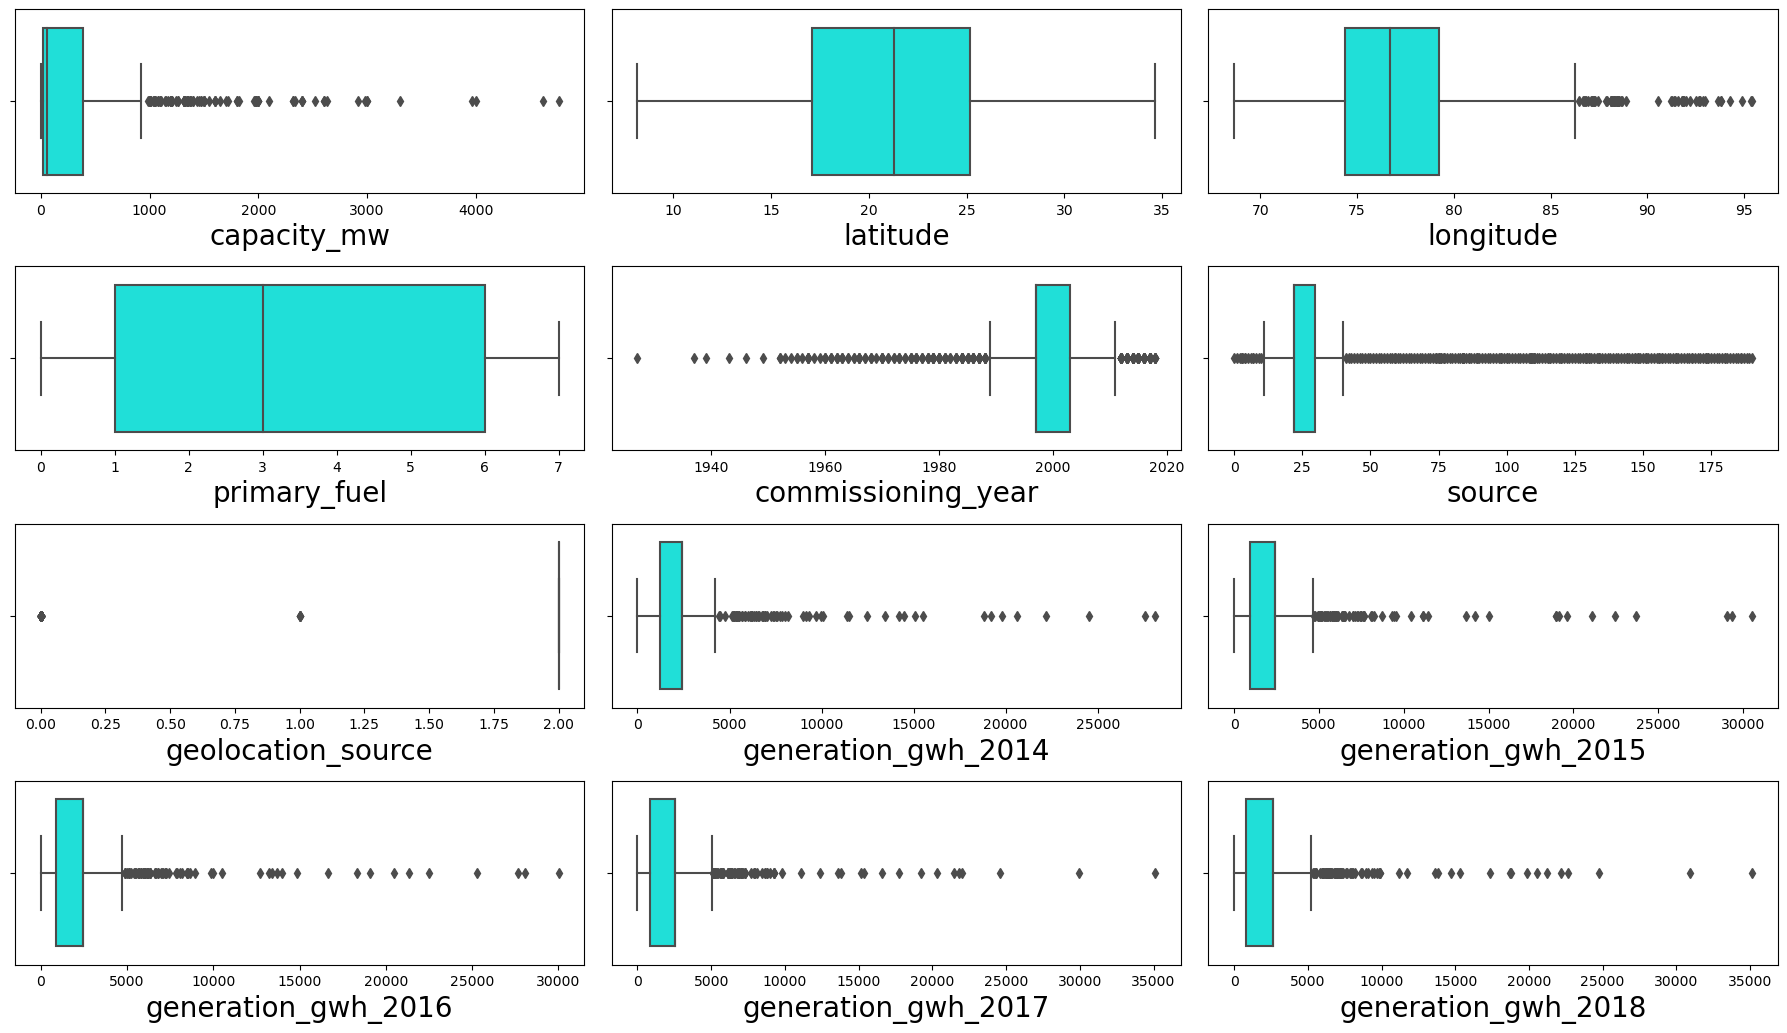

In [45]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show

Observation:

1.The outliers exist in data.


In [46]:
from scipy.stats import zscore

In [47]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)

Shape of the dataframe before removing outliers:  (907, 12)
Shape of the dataframe after removing outliers:  (834, 12)


In [48]:
df=df1.copy()

# Correlation

In [49]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.043531,0.267448,-0.411442,0.300368,-0.273910,0.239033,0.419865,0.426943,0.503474,0.520144,0.523152
latitude,0.043531,1.000000,-0.017580,-0.009711,0.103310,0.072931,-0.194850,0.039119,0.022063,0.009548,0.008286,0.010585
longitude,0.267448,-0.017580,1.000000,-0.395221,0.153202,-0.245933,0.272427,-0.056064,-0.055921,-0.015015,-0.024224,-0.019053
primary_fuel,-0.411442,-0.009711,-0.395221,1.000000,-0.149361,0.063349,-0.470384,-0.039659,-0.036335,-0.046883,-0.042933,-0.043973
commissioning_year,0.300368,0.103310,0.153202,-0.149361,1.000000,-0.006930,0.019350,0.123766,0.151719,0.199849,0.191563,0.188095
source,-0.273910,0.072931,-0.245933,0.063349,-0.006930,1.000000,-0.521252,0.083684,0.091230,0.088558,0.089444,0.093873
geolocation_source,0.239033,-0.194850,0.272427,-0.470384,0.019350,-0.521252,1.000000,-0.068284,-0.074440,-0.072260,-0.072983,-0.076597
generation_gwh_2014,0.419865,0.039119,-0.056064,-0.039659,0.123766,0.083684,-0.068284,1.000000,0.889558,0.792048,0.739721,0.745463
generation_gwh_2015,0.426943,0.022063,-0.055921,-0.036335,0.151719,0.091230,-0.074440,0.889558,1.000000,0.902667,0.809409,0.812029
generation_gwh_2016,0.503474,0.009548,-0.015015,-0.046883,0.199849,0.088558,-0.072260,0.792048,0.902667,1.000000,0.912056,0.909340


<AxesSubplot:>

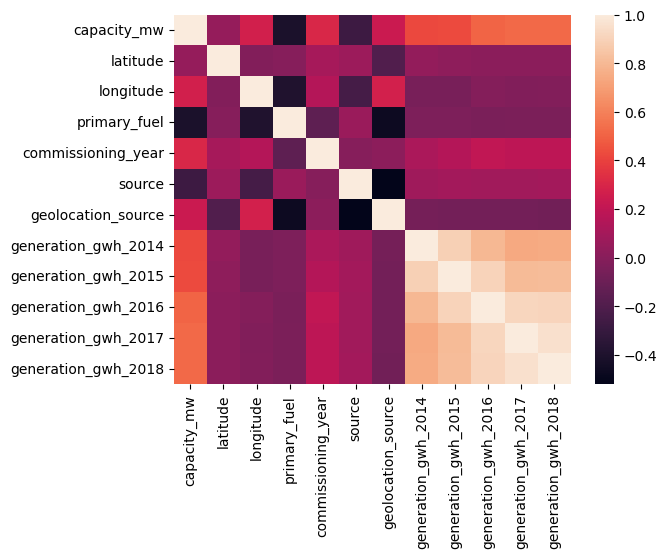

In [50]:
sns.heatmap(df.corr())

Observation:

1.The label capacity_mw is highly positively correlated with the features generation_gwh_2017,generation_gwh_2016,
generation_gwh_2015,generation_gwh_2014,generation_gwh_2018.
2.Capaity is negatively correlated with the features primary_fuel and source.

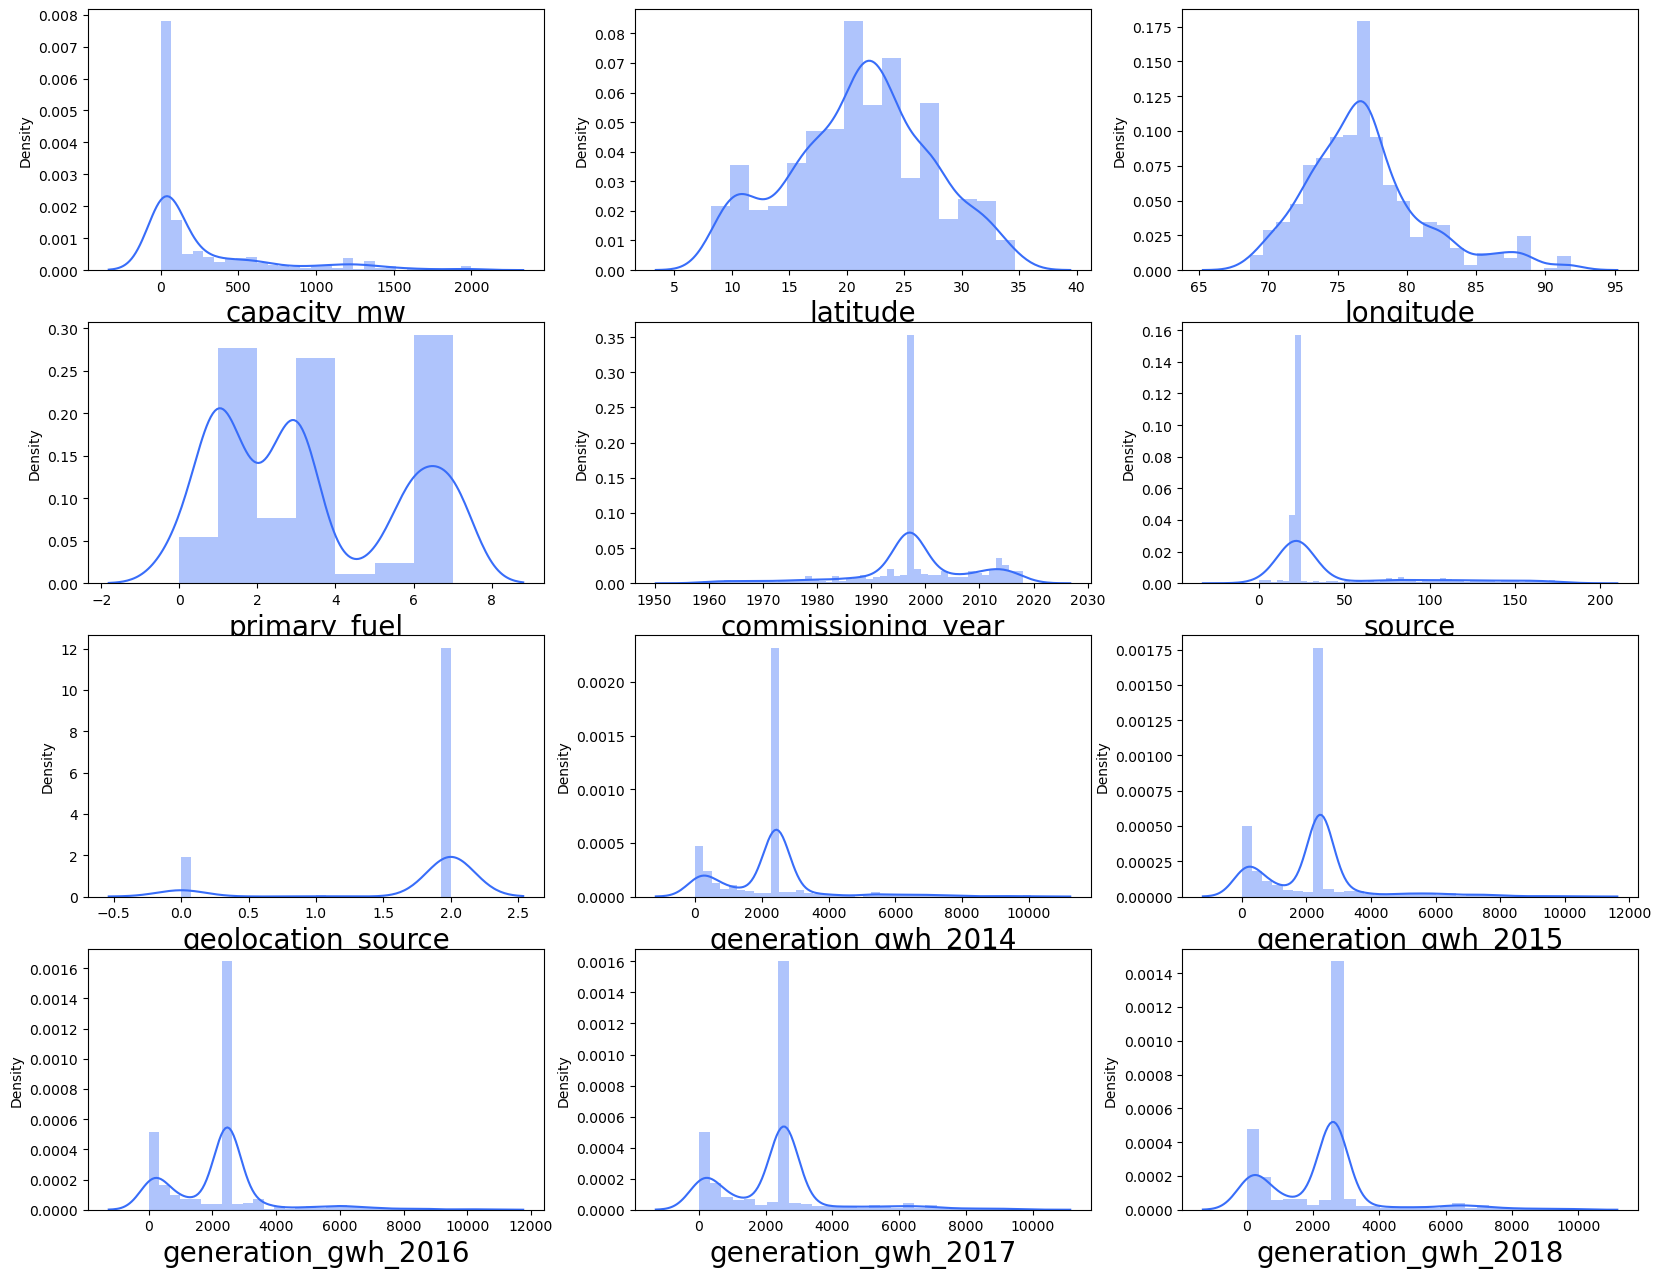

In [51]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Skewness

In [52]:
df.skew()

capacity_mw            1.952694
latitude              -0.111185
longitude              0.938745
primary_fuel           0.412133
commissioning_year    -0.842130
source                 1.784584
geolocation_source    -2.104209
generation_gwh_2014    1.523244
generation_gwh_2015    1.388578
generation_gwh_2016    1.411295
generation_gwh_2017    1.278075
generation_gwh_2018    1.315105
dtype: float64

In [53]:
skew = ['longitude','generation_gwh_2014','generation_gwh_2018','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','source']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [54]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2018,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,source
0,-0.921347,0.332511,0.381288,0.361999,0.365398,0.366120,1.614826
1,-0.501374,0.332511,0.381288,0.361999,0.365398,0.366120,2.089015
2,-2.365890,0.332511,0.381288,0.361999,0.365398,0.366120,-0.468464
3,2.432334,-1.029087,-0.907581,-0.714966,-0.667629,-0.887604,-0.400281
4,1.257683,0.666832,2.098191,1.878809,1.915261,1.551428,-0.400281


In [55]:
df.skew()

capacity_mw            1.952694
latitude              -0.111185
longitude             -0.000474
primary_fuel           0.412133
commissioning_year    -0.842130
source                -0.179189
geolocation_source    -2.104209
generation_gwh_2014   -0.249970
generation_gwh_2015   -0.313081
generation_gwh_2016   -0.312658
generation_gwh_2017   -0.343453
generation_gwh_2018   -0.356856
dtype: float64

In [57]:
df.drop("generation_gwh_2018",axis=1,inplace=True)
df.drop("generation_gwh_2014",axis=1,inplace=True)
df.drop("generation_gwh_2015",axis=1,inplace=True)
df.drop("generation_gwh_2016",axis=1,inplace=True)
df.drop("generation_gwh_2017",axis=1,inplace=True)

In [58]:
df.shape

(834, 7)

# Scaling Of Data

In [60]:
x = df.drop(['primary_fuel'], axis =1)
y = df['primary_fuel']

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.63527803,  1.15538805, -0.92134703,  1.16558536,  1.61482625,
        -1.05558922],
       [-0.41105872,  0.59812468, -0.50137388, -0.07237698,  2.08901485,
         0.40196278],
       [-0.54911207,  0.13137421, -2.36588956, -0.07237698, -0.46846403,
         0.40196278],
       ...,
       [-0.58127757, -0.94936714, -0.2270998 , -0.07237698, -0.46846403,
         0.40196278],
       [-0.45331995,  0.53024408, -0.76086417, -0.07237698,  0.91679417,
         0.40196278],
       [-0.60240818, -1.82031945,  0.25662556, -0.07237698, -0.46846403,
         0.40196278]])

# VIF

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif 

,vif,features
0,1.238206,capacity_mw
1,1.058577,latitude
2,1.169385,longitude
3,1.121232,commissioning_year
4,1.219850,source
5,1.333212,geolocation_source


# Modelling of Data

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (558, 6)
Training target vector size: (558,)
Test feature matrix size: (276, 6)
Test target vector size: (276,)


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.5217391304347826 on Random_state 90


# Logistic Regression

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

print('Accuracy Score of Logistics Regression :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of Logistics Regression :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of Logistics Regression',classification_report(y_test, y_pred))

Accuracy Score of Logistics Regression : 0.4166666666666667


Confusion matrix of Logistics Regression : [[ 0  0  0  0  0  4  7]
 [ 0 44  0 24  0  5  3]
 [ 0 10  0  9  0  1  1]
 [ 0 13  0 39  0 24  9]
 [ 0  1  0  5  0  2  2]
 [ 0  1  0  4  0 27  1]
 [ 0  0  0 13  0 22  5]]


classification Report of Logistics Regression               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.64      0.58      0.61        76
           2       0.00      0.00      0.00        21
           3       0.41      0.46      0.44        85
           5       0.00      0.00      0.00        10
           6       0.32      0.82      0.46        33
           7       0.18      0.12      0.15        40

    accuracy                           0.42       276
   macro avg       0.22      0.28      0.24       276
weighted avg       0.37      0.42      0.38       276



# Decision Tree Classifier

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

print('Accuracy Score of Decision Tree Classifier :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of Decision Tree Classifier :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of Decision Tree Classifier',classification_report(y_test, y_pred))

Accuracy Score of Decision Tree Classifier : 0.782608695652174


Confusion matrix of Decision Tree Classifier : [[ 8  3  0  0  0  0  0  0]
 [ 7 53  5  7  2  2  0  0]
 [ 0  7  9  4  0  1  0  0]
 [ 0 10  3 70  0  2  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  1  3  3  0  3  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 40]]


classification Report of Decision Tree Classifier               precision    recall  f1-score   support

           0       0.53      0.73      0.62        11
           1       0.72      0.70      0.71        76
           2       0.45      0.43      0.44        21
           3       0.83      0.82      0.83        85
           4       0.00      0.00      0.00         0
           5       0.38      0.30      0.33        10
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        40

    accuracy                           0.78       276
   macro avg       0.61      0.62      0.62       276
weighted avg       0.79

# SVC

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

print('Accuracy Score of SVC :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of SVC :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of SVC',classification_report(y_test, y_pred))

Accuracy Score of SVC : 0.4166666666666667


Confusion matrix of SVC : [[ 0  0  0 11  0  0  0]
 [ 0 42  0 34  0  0  0]
 [ 0  8  0 13  0  0  0]
 [ 0 12  0 73  0  0  0]
 [ 0  1  0  9  0  0  0]
 [ 0  1  0 32  0  0  0]
 [ 0  0  0 40  0  0  0]]


classification Report of SVC               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.66      0.55      0.60        76
           2       0.00      0.00      0.00        21
           3       0.34      0.86      0.49        85
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        33
           7       0.00      0.00      0.00        40

    accuracy                           0.42       276
   macro avg       0.14      0.20      0.16       276
weighted avg       0.29      0.42      0.32       276



# KNeighbors Classifier

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print('Accuracy Score of KNN :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of KNN :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of KNN',classification_report(y_test, y_pred))

Accuracy Score of KNN : 0.5217391304347826


Confusion matrix of KNN : [[ 8  2  0  0  0  0  1]
 [ 2 45  3 19  1  0  6]
 [ 1  8  7  4  0  0  1]
 [ 3 27  3 38  0  3 11]
 [ 1  2  2  1  0  0  4]
 [ 1  5  1  1  0 23  2]
 [ 3  8  3  0  1  2 23]]


classification Report of KNN               precision    recall  f1-score   support

           0       0.42      0.73      0.53        11
           1       0.46      0.59      0.52        76
           2       0.37      0.33      0.35        21
           3       0.60      0.45      0.51        85
           5       0.00      0.00      0.00        10
           6       0.82      0.70      0.75        33
           7       0.48      0.57      0.52        40

    accuracy                           0.52       276
   macro avg       0.45      0.48      0.46       276
weighted avg       0.53      0.52      0.52       276



# Extra Tree Classifier

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_pred=etc.predict(x_test)

print('Accuracy Score of Extra Tree Classifier :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of Extra Tree Classifier :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of Extra Tree Classifier',classification_report(y_test, y_pred))

Accuracy Score of Extra Tree Classifier : 0.8478260869565217


Confusion matrix of Extra Tree Classifier : [[10  1  0  0  0  0  0]
 [ 2 63  6  4  0  0  1]
 [ 0  5 11  3  2  0  0]
 [ 0 10  1 73  1  0  0]
 [ 0  0  3  3  4  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0 40]]


classification Report of Extra Tree Classifier               precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.80      0.83      0.81        76
           2       0.52      0.52      0.52        21
           3       0.88      0.86      0.87        85
           5       0.57      0.40      0.47        10
           6       1.00      1.00      1.00        33
           7       0.98      1.00      0.99        40

    accuracy                           0.85       276
   macro avg       0.80      0.79      0.79       276
weighted avg       0.85      0.85      0.85       276



In [75]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Ada Boost Classifier

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred=abc.predict(x_test)

print('Accuracy Score of Ada Boost Classifier :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of Ada Boost Classifier :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of Ada Boost Classifier',classification_report(y_test, y_pred))

Accuracy Score of Ada Boost Classifier : 0.40217391304347827


Confusion matrix of Ada Boost Classifier : [[ 9  2  0  0  0  0  0]
 [ 4 72  0  0  0  0  0]
 [ 1 20  0  0  0  0  0]
 [27 58  0  0  0  0  0]
 [ 2  8  0  0  0  0  0]
 [ 0  3  0  0  0 30  0]
 [ 0 40  0  0  0  0  0]]


classification Report of Ada Boost Classifier               precision    recall  f1-score   support

           0       0.21      0.82      0.33        11
           1       0.35      0.95      0.52        76
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        85
           5       0.00      0.00      0.00        10
           6       1.00      0.91      0.95        33
           7       0.00      0.00      0.00        40

    accuracy                           0.40       276
   macro avg       0.22      0.38      0.26       276
weighted avg       0.23      0.40      0.27       276



# Gradient Boosting Classifier

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)

print('Accuracy Score of Gradient Boosting Classifier:', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of Gradient Boosting Classifier :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of Gradient Boosting Classifier',classification_report(y_test, y_pred))

Accuracy Score of Gradient Boosting Classifier: 0.8369565217391305


Confusion matrix of Gradient Boosting Classifier : [[ 9  1  0  0  1  0  0]
 [ 3 63  3  6  0  1  0]
 [ 1  4 12  3  1  0  0]
 [ 0  9  1 75  0  0  0]
 [ 0  0  3  5  2  0  0]
 [ 0  3  0  0  0 30  0]
 [ 0  0  0  0  0  0 40]]


classification Report of Gradient Boosting Classifier               precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.79      0.83      0.81        76
           2       0.63      0.57      0.60        21
           3       0.84      0.88      0.86        85
           5       0.50      0.20      0.29        10
           6       0.97      0.91      0.94        33
           7       1.00      1.00      1.00        40

    accuracy                           0.84       276
   macro avg       0.77      0.74      0.75       276
weighted avg       0.83      0.84      0.83       276



# Random Forest Classifier

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

print('Accuracy Score of Random Forest Classifier :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of  Random Forest Classifier :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of  Random Forest Classifier',classification_report(y_test, y_pred))

Accuracy Score of Random Forest Classifier : 0.8514492753623188


Confusion matrix of  Random Forest Classifier : [[ 9  2  0  0  0  0  0]
 [ 1 66  4  5  0  0  0]
 [ 0  5 12  2  2  0  0]
 [ 0  9  0 75  1  0  0]
 [ 0  0  3  4  3  0  0]
 [ 0  3  0  0  0 30  0]
 [ 0  0  0  0  0  0 40]]


classification Report of  Random Forest Classifier               precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.78      0.87      0.82        76
           2       0.63      0.57      0.60        21
           3       0.87      0.88      0.88        85
           5       0.50      0.30      0.37        10
           6       1.00      0.91      0.95        33
           7       1.00      1.00      1.00        40

    accuracy                           0.85       276
   macro avg       0.81      0.76      0.78       276
weighted avg       0.85      0.85      0.85       276



In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
model=[
       LogisticRegression(),
       SVC(),
       GradientBoostingClassifier(),
       DecisionTreeClassifier(),
       KNeighborsClassifier(n_neighbors = 3),
       RandomForestClassifier(),
       ExtraTreesClassifier(),
       AdaBoostClassifier() ]

for t in model:
    score = cross_val_score(t, x_scaled, y, cv =5)
    print('\n')
    print('Cross Validation Score', t)
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')



Cross Validation Score LogisticRegression()
Score : [0.64071856 0.68862275 0.65269461 0.68263473 0.69879518]
Mean Score : 0.6726931678811052
Std deviation : 0.022164020950935504




Cross Validation Score SVC()
Score : [0.70658683 0.74251497 0.7245509  0.7245509  0.72289157]
Mean Score : 0.7242190318158863
Std deviation : 0.011380847607287442




Cross Validation Score GradientBoostingClassifier()
Score : [0.80838323 0.83832335 0.86826347 0.80838323 0.80722892]
Mean Score : 0.826116441815165
Std deviation : 0.024129040288415553




Cross Validation Score DecisionTreeClassifier()
Score : [0.79041916 0.73652695 0.83832335 0.73652695 0.77710843]
Mean Score : 0.7757809681841137
Std deviation : 0.03797195098230079




Cross Validation Score KNeighborsClassifier(n_neighbors=3)
Score : [0.80838323 0.77844311 0.82634731 0.76646707 0.78915663]
Mean Score : 0.7937594690137797
Std deviation : 0.02133763686461687




Cross Validation Score RandomForestClassifier()
Score : [0.85628743 0.84431138 

# We came to know that Random Forest Classifier has highest accuracy among all

# Grid Search CV

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [85]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [86]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [87]:
Model=RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 100, max_depth=10 ,max_features='auto')
Model.fit(x_train,y_train)

print('Accuracy Score :', accuracy_score(y_test, y_pred))

Accuracy Score : 0.8369565217391305


In [88]:
import joblib
import pickle

In [89]:
filename='Power Plant_Classification.pkl'
pickle.dump(Model,open(filename,'wb'))

# Modelling Of Data for Regression 

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

# Scaling Of Data

In [93]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source'],
      dtype='object')

In [94]:
x = df.drop(['capacity_mw'], axis =1)
y = df['capacity_mw']

In [98]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.15538805, -0.92134703,  1.17021863,  1.16558536,  1.61482625,
        -1.05558922],
       [ 0.59812468, -0.50137388, -0.98994591, -0.07237698,  2.08901485,
         0.40196278],
       [ 0.13137421, -2.36588956,  1.60225154, -0.07237698, -0.46846403,
         0.40196278],
       ...,
       [-0.94936714, -0.2270998 ,  1.60225154, -0.07237698, -0.46846403,
         0.40196278],
       [ 0.53024408, -0.76086417, -0.98994591, -0.07237698,  0.91679417,
         0.40196278],
       [-1.82031945,  0.25662556,  1.60225154, -0.07237698, -0.46846403,
         0.40196278]])

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (558, 6)
Training target vector size: (558,)
Test feature matrix size: (276, 6)
Test target vector size: (276,)


# Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg.score(x_train,y_train)
y_pred=lin_reg.predict(x_test)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score is :',r2_score(y_test,y_pred))

Mean absolute error : 241.6868782035163
Mean squared error : 116263.498526791
Root Mean Squared Error: 340.9743370501525
R2 score is : 0.2681557241143838


# Different ML Models

In [101]:
rfr = RandomForestRegressor()
dtc = DecisionTreeRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
rd=Ridge()
la=Lasso()
svr=SVR()
model = [rfr,rd,dtc,abr,gbr,la,svr]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    y_pred = m.predict(x_test)
    print('\n')                                        
    print(' Error of ', m)
    print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
    print('Mean squared error :', mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

    
    print('R2 score:',r2_score(y_test,y_pred)) 




 Error of  RandomForestRegressor()
Mean absolute error : 188.14892065658168
Mean squared error : 95238.8596243927
Root Mean Squared Error: 308.6079383690457


R2 score: 0.4004995966818914


 Error of  Ridge()
Mean absolute error : 241.69128880093086
Mean squared error : 116260.76330987296
Root Mean Squared Error: 340.9703261427202


R2 score: 0.2681729414944741


 Error of  DecisionTreeRegressor()
Mean absolute error : 231.60418426294822
Mean squared error : 172097.1933812308
Root Mean Squared Error: 414.84598754384837


R2 score: -0.0833008422072472


 Error of  AdaBoostRegressor()
Mean absolute error : 226.00031626895847
Mean squared error : 104158.5825280729
Root Mean Squared Error: 322.7360880472974


R2 score: 0.34435258379942635


 Error of  GradientBoostingRegressor()
Mean absolute error : 185.44276414026294
Mean squared error : 91364.41713978793
Root Mean Squared Error: 302.26547460765005


R2 score: 0.424888064176293


 Error of  Lasso()
Mean absolute error : 242.08346565831

# Cross Val Score of Different Models

In [103]:
# Cross Validation
rfr = RandomForestRegressor()
dtc = DecisionTreeRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
rd=Ridge()
la=Lasso()
svr=SVR()
model = [rfr,rd,dtc,abr,gbr,la,svr]
for m in model:
    score = cross_val_score(m, x, y, cv =5)
    print('\n')
    print('Cross Validation Score :',m)
    print("Mean CV Score :",score.mean())



Cross Validation Score : RandomForestRegressor()
Mean CV Score : 0.444492413056234


Cross Validation Score : Ridge()
Mean CV Score : 0.26201963794054456


Cross Validation Score : DecisionTreeRegressor()
Mean CV Score : 0.12683881182337492


Cross Validation Score : AdaBoostRegressor()
Mean CV Score : 0.3347821394699778


Cross Validation Score : GradientBoostingRegressor()
Mean CV Score : 0.4252169466615866


Cross Validation Score : Lasso()
Mean CV Score : 0.26215690695932575


Cross Validation Score : SVR()
Mean CV Score : -0.27181030818108154


# Grid Search CV

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
grid_params = {
    'max_depth': range(4,12,2),
    'learning_rate': np.arange(0.1,1,0.1),
    'min_samples_split': range(4,8,2)
}

In [106]:
grid = GridSearchCV(gbr, param_grid = grid_params)

In [107]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [108]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 4}

In [109]:
a = grid.best_estimator_
a.fit(x_train,y_train) 

GradientBoostingRegressor(max_depth=4, min_samples_split=4)

In [111]:
Final_Model=GradientBoostingRegressor(learning_rate= 0.1, max_depth=4 ,min_samples_split=4)
Final_Model.fit(x_train,y_train)

print('R2 Score :', r2_score(y_test, y_pred))

R2 Score : 0.4033065749988808


In [112]:
import joblib
import pickle

In [113]:
filename='PowerPlant Regression.pkl'
pickle.dump(Final_Model,open(filename,'wb'))